 Introduction to the project:
 
- Sepsis is caused by the dysregulated reduction to infection
- The bacteria enters the blood upon infection and then slowly all the vital organs malfunction and it leads to the death of the patient. So identifying the possibility of a septic shock upto 8 hours or so before it actually occurs helps in a better survival of the patient (increase in survival rate by 14 to 20%)
- Sepsis is an organ failure and it is described as a serious condition in which the body responds improperly to an infection. the fight of the body against the infection turns against it in sepsis.
- Sepsis may progress to a septic shock which can lead to a dramatic drop in BP that can lead to damage of lungs, kidneys and other vital organs.
- We can save the patient if we can identify the occurence of sepsis by 6 to 8 hrs before it occurs.



In [187]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to see large number of columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


# Evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

# read dataset

In [188]:
df=pd.read_csv("sepsis_status.csv")

In [189]:
dictionary=pd.read_csv("Parameter _detail_Dictionary.csv")

In [190]:
icu_df=df.copy() 
icu_df.head()

,encounter_id,patient_id,hospital_id,septic_shock,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [191]:
icu_df.shape

(91713, 186)

# information about the features

In [192]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'septic_shock', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [193]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


# target variable

In [194]:
icu_df['septic_shock'].value_counts()

septic_shock
0    83798
1     7915
Name: count, dtype: int64

In [195]:
icu_df['septic_shock'].value_counts(normalize=True)# highly imbalanced dataset

septic_shock
0    0.913698
1    0.086302
Name: proportion, dtype: float64

# looking at the dictionary to understand the meaning of the column variables

In [196]:
dictionary.head(50)

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,NaN,integer,Unique identifier associated with a patient un...,NaN
1,identifier,hospital_id,NaN,integer,Unique identifier associated with a hospital,NaN
2,identifier,patient_id,NaN,integer,Unique identifier associated with a patient,NaN
3,demographic,Sepsis_status,NaN,binary,Whether the patient having sepsis during this ...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,NaN
5,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
6,demographic,elective_surgery,NaN,binary,Whether the patient was admitted to the hospit...,0
7,demographic,ethnicity,NaN,string,The common national or cultural tradition whic...,Caucasian
8,demographic,gender,NaN,string,The genotypical sex of the patient,F
9,demographic,height,centimetres,numeric,The height of the person on unit admission,180


In [197]:
for i in range(134,187):
    print(i, dictionary['Variable Name'][i], dictionary['Description'][i])



134 h1_bun_min The lowest blood urea nitrogen concentration of the patient in their serum or plasma during the first hour of their unit stay
135 h1_calcium_max The highest calcium concentration of the patient in their serum during the first hour of their unit stay
136 h1_calcium_min The lowest calcium concentration of the patient in their serum during the first hour of their unit stay
137 h1_creatinine_max The highest creatinine concentration of the patient in their serum or plasma during the first hour of their unit stay
138 h1_creatinine_min The lowest creatinine concentration of the patient in their serum or plasma during the first hour of their unit stay
139 h1_glucose_max The highest glucose concentration of the patient in their serum or plasma during the first hour of their unit stay
140 h1_glucose_min The lowest glucose concentration of the patient in their serum or plasma during the first hour of their unit stay
141 h1_hco3_max The highest bicarbonate concentration for the pati

In [198]:
# to see the detail of a particular group:

def select_category(data, category):
    return data[data.Category==category]

In [199]:
cols=select_category(dictionary, 'APACHE comorbidity')
cols

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
177,APACHE comorbidity,aids,NaN,binary,Whether the patient has a definitive diagnosis...,1
178,APACHE comorbidity,cirrhosis,NaN,binary,Whether the patient has a history of heavy alc...,1
179,APACHE comorbidity,diabetes_mellitus,NaN,binary,Whether the patient has been diagnosed with di...,1
180,APACHE comorbidity,hepatic_failure,NaN,binary,Whether the patient has cirrhosis and addition...,1
181,APACHE comorbidity,immunosuppression,NaN,binary,Whether the patient has their immune system su...,1
182,APACHE comorbidity,leukemia,NaN,binary,Whether the patient has been diagnosed with ac...,1
183,APACHE comorbidity,lymphoma,NaN,binary,Whether the patient has been diagnosed with no...,1
184,APACHE comorbidity,solid_tumor_with_metastasis,NaN,binary,Whether the patient has been diagnosed with an...,1


# Preprocessing of the data:

### missing value check

In [201]:
null=icu_df.isnull().sum()/len(icu_df)
null

encounter_id                      0.000000
patient_id                        0.000000
hospital_id                       0.000000
septic_shock                      0.000000
age                               0.046100
bmi                               0.037388
elective_surgery                  0.000000
ethnicity                         0.015210
gender                            0.000273
height                            0.014545
hospital_admit_source             0.233435
icu_admit_source                  0.001221
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            0.029658
albumin_apache                    0.592926
apache_2_diagnosis                0.018122
apache_3j_diagnosis               0.012005
apache_post_operative             0.000000
arf_apache                        0.007796
bilirubin_a

- ideally we drop the cols with missing value > 25% but here we cannot drop 
  those columns as it will lead to a huge data loss

approach:

- we will drop the columns where the missing value is greater than 50%, for the rest we will not drop the columns but will drop the rows

- we will not apply missing value imputation for such healthacre or critical care dataset

In [204]:
# evaluation of the missing value

high_null=(null[null>0.50]).sort_values(ascending=False)

In [205]:
high_null

h1_bilirubin_max          0.922650
h1_bilirubin_min          0.922650
h1_lactate_max            0.919924
h1_lactate_min            0.919924
h1_albumin_min            0.913982
h1_albumin_max            0.913982
h1_pao2fio2ratio_min      0.874413
h1_pao2fio2ratio_max      0.874413
h1_arterial_ph_min        0.833295
h1_arterial_ph_max        0.833295
h1_hco3_max               0.829697
h1_hco3_min               0.829697
h1_arterial_pco2_max      0.828225
h1_arterial_pco2_min      0.828225
h1_wbc_max                0.828160
h1_wbc_min                0.828160
h1_arterial_po2_max       0.828072
h1_arterial_po2_min       0.828072
h1_calcium_min            0.827178
h1_calcium_max            0.827178
h1_platelets_min          0.825107
h1_platelets_max          0.825107
h1_bun_min                0.818761
h1_bun_max                0.818761
h1_creatinine_max         0.817300
h1_creatinine_min         0.817300
h1_diasbp_invasive_max    0.816983
h1_diasbp_invasive_min    0.816983
h1_sysbp_invasive_mi

In [206]:
high_null.index

Index(['h1_bilirubin_max', 'h1_bilirubin_min', 'h1_lactate_max',
       'h1_lactate_min', 'h1_albumin_min', 'h1_albumin_max',
       'h1_pao2fio2ratio_min', 'h1_pao2fio2ratio_max', 'h1_arterial_ph_min',
       'h1_arterial_ph_max', 'h1_hco3_max', 'h1_hco3_min',
       'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_wbc_max',
       'h1_wbc_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_calcium_min', 'h1_calcium_max', 'h1_platelets_min',
       'h1_platelets_max', 'h1_bun_min', 'h1_bun_max', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min',
       'h1_sysbp_invasive_min', 'h1_sysbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_mbp_invasive_max', 'h1_hematocrit_min', 'h1_hematocrit_max',
       'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_max', 'h1_potassium_min',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'paco2_apache',
       'fio2_apache', 'd1_l

In [207]:
len(high_null)

74

In [208]:
icu=icu_df.drop(columns=high_null.index, axis=1)

In [209]:
icu.shape

(91713, 112)

In [210]:
icu.isnull().sum()/len(icu)

encounter_id                      0.000000
patient_id                        0.000000
hospital_id                       0.000000
septic_shock                      0.000000
age                               0.046100
bmi                               0.037388
elective_surgery                  0.000000
ethnicity                         0.015210
gender                            0.000273
height                            0.014545
hospital_admit_source             0.233435
icu_admit_source                  0.001221
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            0.029658
apache_2_diagnosis                0.018122
apache_3j_diagnosis               0.012005
apache_post_operative             0.000000
arf_apache                        0.007796
bun_apache                        0.210025
creatinine_

In [211]:
# the rest of the missing values are less than 25%, we will drop the rows


df1=icu.dropna()
df1.shape



(27795, 112)

In [212]:
df1.isnull().sum()/len(df1)#---> null values removed

encounter_id                      0.0
patient_id                        0.0
hospital_id                       0.0
septic_shock                      0.0
age                               0.0
bmi                               0.0
elective_surgery                  0.0
ethnicity                         0.0
gender                            0.0
height                            0.0
hospital_admit_source             0.0
icu_admit_source                  0.0
icu_id                            0.0
icu_stay_type                     0.0
icu_type                          0.0
pre_icu_los_days                  0.0
readmission_status                0.0
weight                            0.0
apache_2_diagnosis                0.0
apache_3j_diagnosis               0.0
apache_post_operative             0.0
arf_apache                        0.0
bun_apache                        0.0
creatinine_apache                 0.0
gcs_eyes_apache                   0.0
gcs_motor_apache                  0.0
gcs_unable_a

# dropping unnecessary columns

- In most of the cases the ID columns have no impact on the prediction.
- However, we will keep the hospital id as it indicates the facilities available in the associated hospital

In [214]:
columns_to_drop=['encounter_id', 'patient_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type']

In [215]:
columns_to_drop

['encounter_id',
 'patient_id',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type']

In [216]:
df1=df1.drop(columns_to_drop, axis=1)
df1.shape

(27795, 106)

## Encoding the Categorical columns




In [217]:
# lets find the object columns

object_columns=df1.select_dtypes(include='object').columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [218]:
list(object_columns)

['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [219]:
# categorical:3,6,7,8,10,11,12,15,17,22, 177-186: the numbers for the variables correspond to that shown in the dictionary
#3(target),6(label-encoded), 7(ohe),8(ohe),10(deleted),11(deleted),12(not found),15(ohe),17(single value count),22(label encoded), 177-184(label-encoded),185-186(ohe)

In [220]:
df2=pd.get_dummies(df1, columns=list(object_columns), drop_first=True, dtype=float)   

In [221]:
df2.shape

(27795, 133)

In [222]:
df2.head(2)

,hospital_id,septic_shock,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,0,68.0,22.73,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81,0,77.0,27.42,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## No outlier treatment for healthcare data



# Model building process:

### split the data into dep and independent variable

In [224]:
X=df2.drop('septic_shock', axis=1)
y=df2['septic_shock'] # target variable

In [225]:
# any columns having just one unique value: since there is one unique value in that col, so it does not allow us to distinguish between healthy and unhealthy patients. so we remove these columns

one_unique=X.apply(pd.Series.nunique)
one_unique

hospital_id                                    119
age                                             74
bmi                                          16993
elective_surgery                                 2
height                                         271
pre_icu_los_days                              4637
readmission_status                               1
weight                                        2447
apache_2_diagnosis                              44
apache_3j_diagnosis                            363
apache_post_operative                            2
arf_apache                                       2
bun_apache                                     195
creatinine_apache                              938
gcs_eyes_apache                                  4
gcs_motor_apache                                 6
gcs_unable_apache                                1
gcs_verbal_apache                                5
glucose_apache                                 534
heart_rate_apache              

In [226]:
one_unique_cols=one_unique[one_unique==1].index

In [227]:
one_unique_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [228]:
X=X.drop(one_unique_cols, axis=1)

In [229]:
X.shape

(27795, 130)

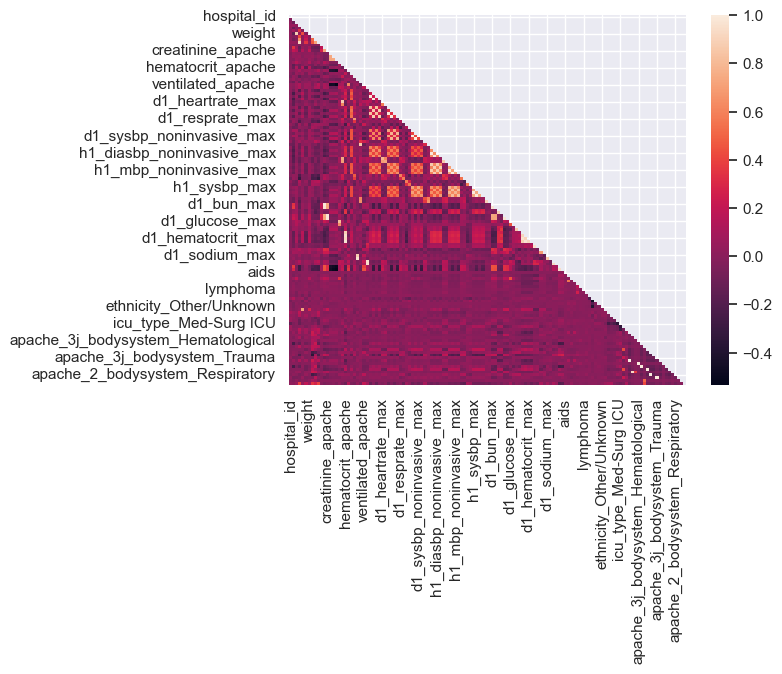

In [230]:
mask = np.triu(np.ones_like(X.corr(method='spearman'))) # have chosen Spearman as it can be applied for non-normal data distribution 
sns.heatmap(X.corr(method='spearman'), mask=mask)
plt.show()

In [231]:
corr_matrix=X.corr(method='spearman')
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
hospital_id,NaN,-0.023046,0.014703,0.049647,0.033495,-0.000866,0.027434,0.005550,0.017585,0.047964,0.000385,-0.008449,0.013198,-0.026168,-0.013921,-0.009046,-0.007863,-0.001770,-0.000898,0.016270,-0.012759,-0.054585,0.003439,-0.059842,0.034473,0.019394,0.012832,-0.015559,0.012855,-0.015755,0.019620,-0.014032,0.005818,-0.030437,0.006060,-0.030315,0.014507,-0.083630,0.025829,-0.033792,-0.009972,-0.029607,-0.009554,-0.029469,0.034897,-0.080696,0.019332,-0.025912,0.019883,-0.022735,0.004763,-0.022250,0.011027,-0.032056,0.009597,-0.030069,-0.018210,-0.079155,0.034078,-0.026530,0.001634,-0.038579,-0.001074,-0.038528,-0.045206,-0.068144,-0.008044,-0.009023,-0.039987,-0.046007,0.015116,0.013134,-0.003566,0.003138,-0.032027,-0.030671,0.013144,0.007160,0.007119,-0.002012,-0.015735,-0.014463,0.021034,-0.011867,0.023314,-0.002739,0.023601,0.018441,-0.011255,0.001336,-0.003196,0.007668,0.004331,0.002292,-0.008219,-0.009682,0.002801,-0.007692,-0.019434,0.048282,-0.070106,-0.008408,-0.006511,0.010381,0.096917,0.019547,0.063454,0.054071,-0.151043,0.066156,0.055449,-0.022047,-0.006083,-0.002519,-0.007910,-0.012637,-0.019986,-0.018626,-0.022033,-0.011496,0.017696,-0.022047,-0.007910,-0.012637,-0.018626,-0.006110,-0.022033,0.017696,-0.004668,0.020737
age,NaN,NaN,-0.102192,0.054517,-0.123064,0.090182,-0.148448,-0.035333,-0.088868,0.045835,-0.019419,0.341147,0.206540,0.042142,0.035899,-0.021180,0.045058,-0.161223,-0.121132,-0.008750,-0.076555,0.031430,0.042749,-0.113531,0.006724,-0.011917,-0.073898,-0.251466,-0.073416,-0.251180,-0.154576,-0.151041,-0.014250,-0.17

In [232]:
upper.shape

(130, 130)

In [233]:
# for identifying the cols with high correlation


list_c_high, list_c_low=[],[]
list_i_high, list_i_low=[],[]
list_corr_high, list_corr_low=[],[]
for i in upper.columns:
    for j in upper.index:
        p=upper.loc[i,j]
        if (p>0.85 and p<1) or (p<-0.85):
            list_c_high.append(i)
            list_i_high.append(j)
            list_corr_high.append(p)
#            list_corr=set(list_corr)


df_corr_high=pd.DataFrame(data={"var1":list_c_high, "var2": list_i_high, "correlation": list_corr_high})




In [234]:
df_corr_high  # col pairs with high multicollinearity 

,var1,var2,correlation
0,bmi,weight,0.880394
1,elective_surgery,apache_post_operative,0.920698
2,bun_apache,d1_bun_max,0.989927
3,bun_apache,d1_bun_min,0.969964
4,creatinine_apache,d1_creatinine_max,0.978576
5,creatinine_apache,d1_creatinine_min,0.981458
6,heart_rate_apache,d1_heartrate_max,0.871626
7,hematocrit_apache,d1_hemaglobin_max,0.891106
8,hematocrit_apache,d1_hemaglobin_min,0.951040
9,hematocrit_apache,d1_hematocrit_max,0.924423


<function matplotlib.pyplot.show(close=None, block=None)>

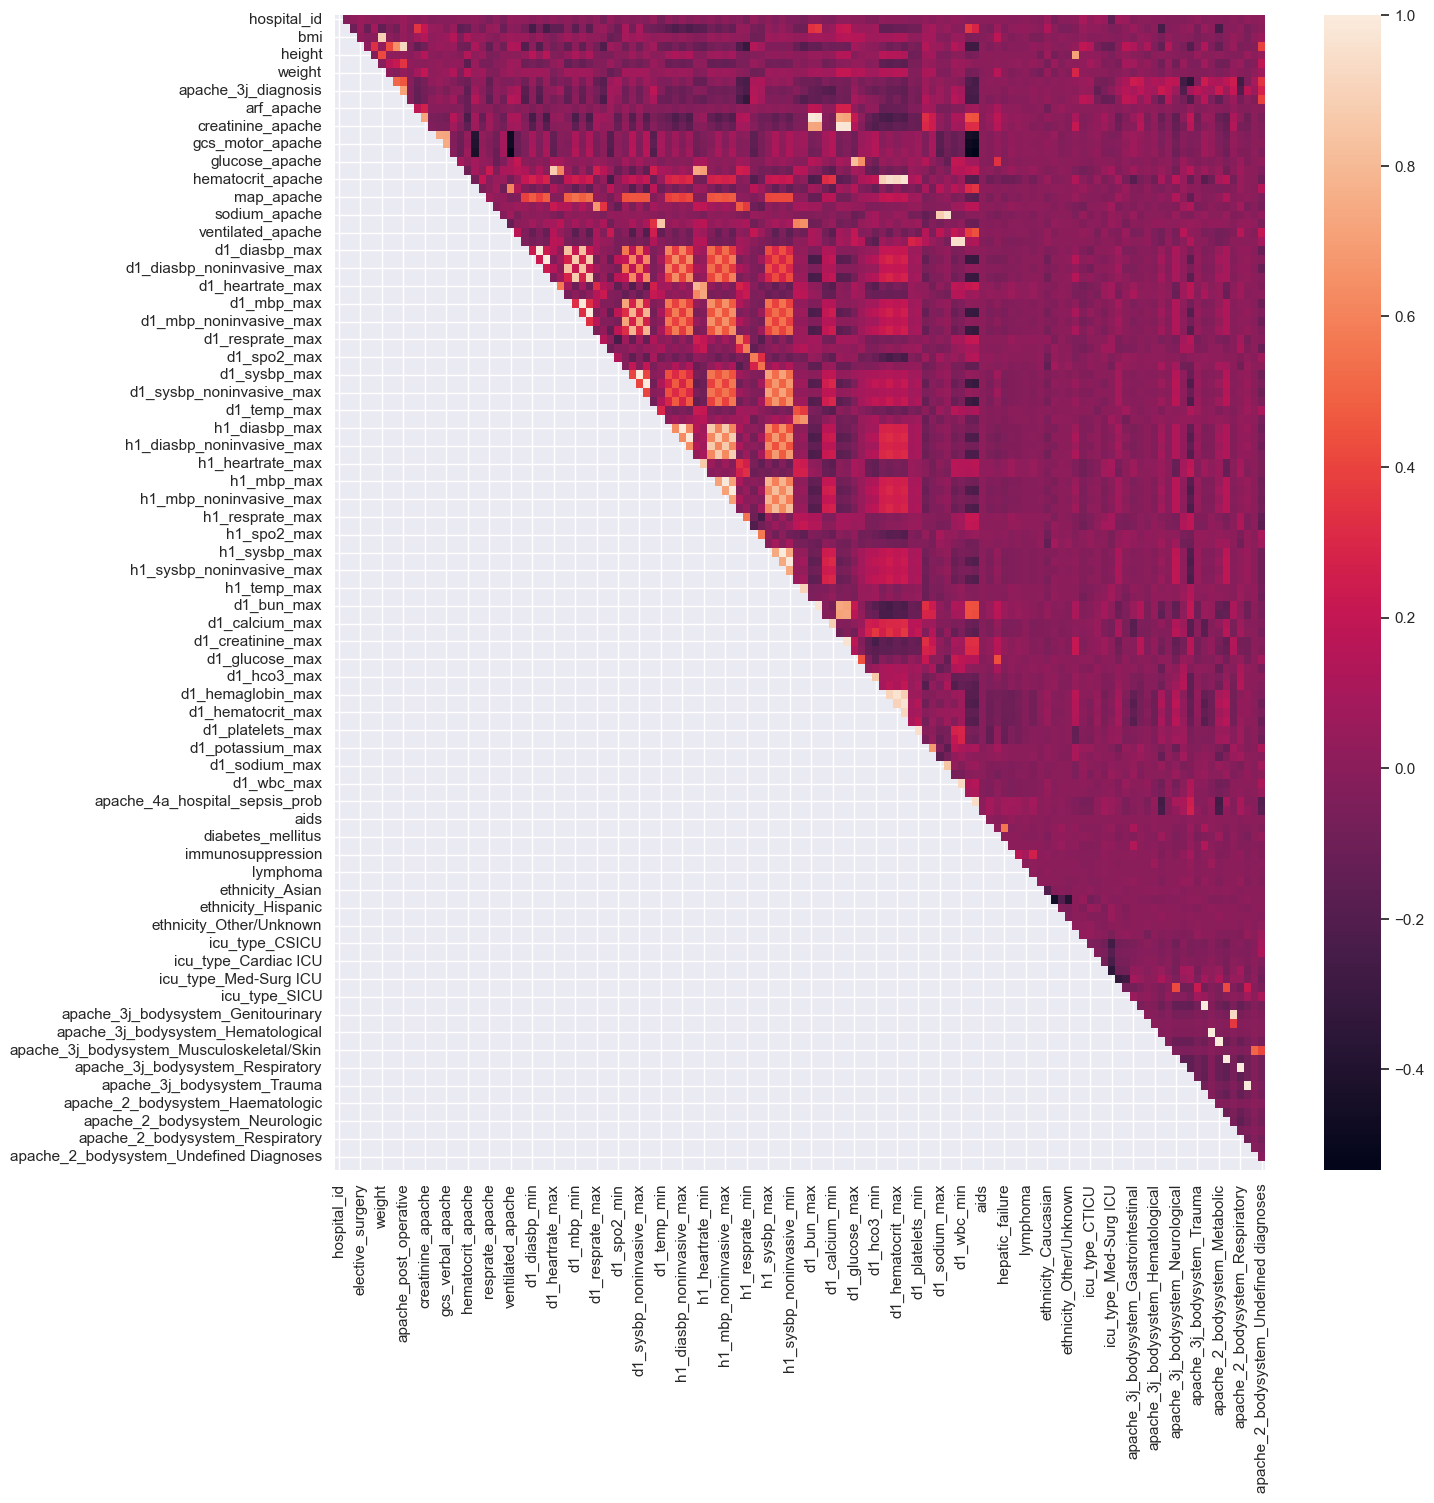

In [235]:
# to see upper matrix
plt.figure(figsize=(15,15))
sns.heatmap(upper)
plt.show


# scaling

In [238]:
X.head(2)

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,118,68.0,22.73,0,180.3,0.541667,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81,77.0,27.42,0,160.0,0.927778,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.7,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [239]:
#Scaling on whole data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_sc=scaler.fit_transform(X)
X_sc=pd.DataFrame(X_sc, columns=X.columns)
X_sc.head()







,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_sepsis_prob,apache_4a_icu_sepsis_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.574257,0.712329,0.148859,0.0,0.738140,0.011390,0.239484,0.057971,0.190949,0.0,0.0,0.219512,0.203125,0.666667,1.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.571429,0.414634,0.947368,0.0,0.293987,0.184874,0.311688,0.184874,0.311688,0.512605,0.503497,0.233871,0.266667,0.239669,0.266667,0.256410,0.250,1.000000,0.74,0.288732,0.268908,0.288732,0.268723,1.000000,0.898494,0.292453,0.450549,0.289720,0.445652,0.618644,0.666667,0.318966,0.500000,0.324561,0.500000,0.326531,0.152542,1.000000,0.74,0.378378,0.439716,0.378378,0.436620,1.000000,0.718750,0.221311,0.245254,0.500000,0.395833,0.201486,0.200251,0.176580,0.298039,0.250000,0.25000,0.201923,0.315789,0.225080,0.333333,0.369176,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017,0.555556,0.532995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.391089,0.835616,0.237400,0.0,0.390478,0.017132,0.214383,0.033816,0.048571,0.0,0.0,0.040650,0.023897,0.000000,0.4,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.517857,0.682927,0.394737,1.0,0.262806,0.411765,0.233766,0.411765,0.233766,0.504202,0.503497,0.483871,0.177778,0.495868,0.177778,0.230769,0.300,1.000000,0.70,0.485915,0.218487,0.485915,0.218290,0.250000,0.543224,0.226415,0.285714,0.224299,0.282609,0.576271,0.592593,0.310345,0.235849,0.315789,0.235849,0.428571,0.237288,0.944444,0.70,0.135135,0.127660,0.135135,0.126761,0.475410,0.531250,0.057377,0.054501,0.521739,0.520833,0.034355,0.026977,0.133829,0.372549,0.535714,0.59375,0.43

In [240]:
# Scaling after splitting into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, random_state=101, stratify=y)


In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train)
X_train_sc

array([[0.62376238, 0.98630137, 0.13673073, ..., 0.        , 0.        ,
        0.        ],
       [0.92079208, 0.56164384, 0.2210466 , ..., 0.        , 0.        ,
        0.        ],
       [0.92079208, 0.50684932, 0.71984528, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12376238, 0.94520548, 0.06368924, ..., 0.        , 0.        ,
        0.        ],
       [0.92079208, 0.69863014, 0.18025154, ..., 1.        , 0.        ,
        0.        ],
       [0.48514851, 0.5890411 , 0.24944103, ..., 0.        , 0.        ,
        0.        ]])

In [242]:
X_test_sc=scaler.transform(X_test)  # no need to convert to dataframe. we can use numpy array also
X_test_sc

array([[0.22277228, 0.80821918, 0.15091345, ..., 0.        , 0.        ,
        0.        ],
       [0.2970297 , 0.26027397, 0.22612675, ..., 0.        , 0.        ,
        0.        ],
       [0.96039604, 0.53424658, 0.14194316, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.57425743, 0.65753425, 0.56304142, ..., 0.        , 0.        ,
        0.        ],
       [0.86138614, 0.12328767, 0.15088858, ..., 0.        , 0.        ,
        0.        ],
       [0.94059406, 0.71232877, 0.24124885, ..., 0.        , 0.        ,
        0.        ]])

- we don't do any imbalance treatment generally for such critical healthcare data as that will be creating false data for such a sensitive data.

# Model building

In [243]:
# import algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Base classifiers

In [244]:
logistic=LogisticRegression(random_state=101)
dt=DecisionTreeClassifier(random_state=101)
rf=RandomForestClassifier(random_state=101)
bgg=BaggingClassifier(random_state=101)
svc=SVC(random_state=101)
knn=KNeighborsClassifier()

In [245]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [246]:
p=[]
r=[]
model_list=[]


for model in [dt, rf, bgg, svc, knn, logistic]:
    print('########'*3)
    print("Performance of model", model)
    print("##########"*3)

    xyz=model.fit(X_train_sc, Y_train)
    Y_pred_test=xyz.predict(X_test_sc)
    cm=confusion_matrix(Y_test, Y_pred_test)
    cr=classification_report(Y_test, Y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)
    
    p.append(precision_score(Y_test, Y_pred_test))
    r.append(recall_score(Y_test, Y_pred_test))
    model_list.append(model)

########################
Performance of model DecisionTreeClassifier(random_state=101)
##############################
confusion_matrix 
 [[5842  473]
 [ 404  230]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      6315
           1       0.33      0.36      0.34       634

    accuracy                           0.87      6949
   macro avg       0.63      0.64      0.64      6949
weighted avg       0.88      0.87      0.88      6949

########################
Performance of model RandomForestClassifier(random_state=101)
##############################
confusion_matrix 
 [[6255   60]
 [ 464  170]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6315
           1       0.74      0.27      0.39       634

    accuracy                           0.92      6949
   macro avg       0.84      0.63      0.68      6949
weighted avg       0.91  

In [247]:
# metrics of base classifier


metric_base=pd.DataFrame({'precision': p, 'recall': r, 'model': ['dt', 'rf', 'bgg', 'svc', 'knn', 'logistic']}).sort_values(by='recall', ascending=False)
metric_base

,precision,recall,model
0,0.327169,0.362776,dt
5,0.651568,0.294953,logistic
1,0.739130,0.268139,rf
2,0.584229,0.257098,bgg
3,0.802548,0.198738,svc
4,0.578313,0.151420,knn


In [248]:
# Cross validation of the DT model (highest recall seen above): 

from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(random_state=101)

cv= cross_val_score(dt, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

[0.36745407 0.34210526 0.38157895 0.42368421 0.37007874]
0.3769802458903163


### Lets try Boosting classifiers:

In [249]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [250]:
from xgboost import XGBClassifier

In [251]:
gbc=GradientBoostingClassifier(random_state=101)
abc=AdaBoostClassifier(random_state=101)
xgbc=XGBClassifier(random_state=101)

In [252]:
p=[]
r=[]
model_list=[]


for model in [gbc, abc, xgbc]:

    print('########'*3)
    print("Performance of model", model)
    print("##########"*3)

    xyz=model.fit(X_train_sc, Y_train)
    Y_pred_test=xyz.predict(X_test_sc)
    cm=confusion_matrix(Y_test, Y_pred_test)
    cr=classification_report(Y_test, Y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)
    
    p.append(precision_score(Y_test, Y_pred_test))
    r.append(recall_score(Y_test, Y_pred_test))
    model_list.append(model)

########################
Performance of model GradientBoostingClassifier(random_state=101)
##############################
confusion_matrix 
 [[6218   97]
 [ 418  216]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6315
           1       0.69      0.34      0.46       634

    accuracy                           0.93      6949
   macro avg       0.81      0.66      0.71      6949
weighted avg       0.91      0.93      0.91      6949

########################
Performance of model AdaBoostClassifier(random_state=101)
##############################
confusion_matrix 
 [[6185  130]
 [ 416  218]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6315
           1       0.63      0.34      0.44       634

    accuracy                           0.92      6949
   macro avg       0.78      0.66      0.70      6949
weighted avg       0.91  

In [253]:
# metrics of boosting classifiers


metric_base=pd.DataFrame({'precision': p, 'recall': r, 'model': ['gbc', 'abc', 'xgbc']}).sort_values(by='recall', ascending=False)
metric_base

,precision,recall,model
2,0.639665,0.361199,xgbc
1,0.626437,0.343849,abc
0,0.690096,0.340694,gbc


- Insights: XGBoost gives us the best recall and also a high precision amongst all the base models

In [2]:
# Cross validation of the XGBoost: 

from sklearn.model_selection import cross_val_score

xgbc=XGBClassifier(random_state=101)

cv= cross_val_score(xgbc, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

In [ ]:
[0.30971129 0.32631579 0.33157895 0.29210526 0.27296588]
0.30653543307086617

# Weighted algorithms

Class weights in the models:
    
Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier, using class_weights we can specify a higher weight for the minority class using a dictionary.

Without weights set, the model treats each point as equally important. Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal.

In [256]:
dt=DecisionTreeClassifier(random_state=101, class_weight='balanced')
rf=RandomForestClassifier(random_state=101, class_weight='balanced')
bgg=BaggingClassifier(random_state=101)
svc=SVC(random_state=101, class_weight='balanced')
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier(random_state=101)
abc=AdaBoostClassifier(random_state=101)
xgbc=XGBClassifier(random_state=101, class_weight='balanced')

In [257]:
for model in [dt, rf, bgg, svc, knn, gbc, abc, xgbc]:
    print('########'*3)
    print("Performance of model", model)
    print("##########"*3)

    xyz=model.fit(X_train_sc, Y_train)
    y_pred_test=xyz.predict(X_test_sc)
    cm=confusion_matrix(Y_test, y_pred_test)
    cr=classification_report(Y_test, y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

########################
Performance of model DecisionTreeClassifier(class_weight='balanced', random_state=101)
##############################
confusion_matrix 
 [[5873  442]
 [ 434  200]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6315
           1       0.31      0.32      0.31       634

    accuracy                           0.87      6949
   macro avg       0.62      0.62      0.62      6949
weighted avg       0.87      0.87      0.87      6949

########################
Performance of model RandomForestClassifier(class_weight='balanced', random_state=101)
##############################
confusion_matrix 
 [[6284   31]
 [ 528  106]]
classification_report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6315
           1       0.77      0.17      0.27       634

    accuracy                           0.92      6949
   macro avg       0.85      

In [258]:
# Cross validation of the SVC weighted (good recall): 

from sklearn.model_selection import cross_val_score

svc=SVC(random_state=101, class_weight='balanced')

cv= cross_val_score(svc, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

[0.72703412 0.69736842 0.73421053 0.76578947 0.72440945]
0.7297623981212875


# Hyperparameter Tuning of DT classifier 

In [259]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## roc_auc

In [260]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)

random_cv_dt=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= 'roc_auc', random_state=101)
random_cv_dt.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, scoring='roc_auc')

In [261]:
random_cv_dt.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random')

In [262]:
random_cv_dt.best_score_

0.7589549452310805

In [263]:
for model in [random_cv_dt]:
    Y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, Y_pred_test)
    cr=classification_report(Y_test, Y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[4650 1665]
 [ 177  457]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.74      0.83      6315
           1       0.22      0.72      0.33       634

    accuracy                           0.73      6949
   macro avg       0.59      0.73      0.58      6949
weighted avg       0.90      0.73      0.79      6949



## Changing the scoring metric to: f1_macro

In [266]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)
random_cv_dt2=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= 'f1_macro', random_state=101)
random_cv_dt2.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, scoring='f1_macro')

In [267]:
random_cv_dt2.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features='sqrt', min_samples_split=5,
                       random_state=101)

In [268]:
random_cv_dt2.best_score_

0.6256322675276955

In [269]:
for model in [random_cv_dt2]:
    Y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, Y_pred_test)
    cr=classification_report(Y_test, Y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[5783  532]
 [ 409  225]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      6315
           1       0.30      0.35      0.32       634

    accuracy                           0.86      6949
   macro avg       0.62      0.64      0.62      6949
weighted avg       0.88      0.86      0.87      6949



# scoring metric= f1_score

In [270]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)
random_cv_dt3=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= 'f1', random_state=101)# scoring parameter is optimized for class 1
random_cv_dt3.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, scoring='f1')

In [271]:
random_cv_dt3.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101)

In [272]:
random_cv_dt3.best_score_

0.35950225875667213

In [273]:
for model in [random_cv_dt3]:
    Y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, Y_pred_test)
    cr=classification_report(Y_test, Y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[5178 1137]
 [ 207  427]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      6315
           1       0.27      0.67      0.39       634

    accuracy                           0.81      6949
   macro avg       0.62      0.75      0.64      6949
weighted avg       0.90      0.81      0.84      6949



In [274]:
# Cross validation of the DT tuned-f1 score: 

from sklearn.model_selection import cross_val_score

cv= cross_val_score(random_cv_dt3, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

[0.61417323 0.62368421 0.63684211 0.62368421 0.60104987]
0.61988672468573


# scoring metric: recall

In [275]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)
random_cv_dt4=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= 'recall', random_state=101)
random_cv_dt4.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, scoring='recall')

In [276]:
random_cv_dt4.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random')

In [277]:
random_cv_dt4.best_score_

0.6677041027766265

In [278]:
for model in [random_cv_dt4]:
    y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, y_pred_test)
    cr=classification_report(Y_test, y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[4650 1665]
 [ 177  457]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.74      0.83      6315
           1       0.22      0.72      0.33       634

    accuracy                           0.73      6949
   macro avg       0.59      0.73      0.58      6949
weighted avg       0.90      0.73      0.79      6949



In [279]:
# y_pred_test=random_cv_dt4.predict(X_test)
# accuracy_score(Y_test, y_pred_test)

- insights: optimizing for recall gives the same result as optimizing for roc_auc above

In [281]:
# Cross validation of the DT tuned-recall: 

from sklearn.model_selection import cross_val_score

cv= cross_val_score(random_cv_dt4, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

[0.67454068 0.63684211 0.69736842 0.64210526 0.68766404]
0.6677041027766265


# scoring: f1_score of minority class

In [282]:
from sklearn.metrics import make_scorer, f1_score

In [283]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)
scoring = {'f1_minority': make_scorer(f1_score, average=None, labels=[1])} # label 1 is for minority class in my dataset

random_cv_dt5=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= scoring, random_state=101, refit='f1_minority')
random_cv_dt5.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, refit='f1_minority',
                   scoring={'f1_minority': make_scorer(f1_score, average=None, labels=[1])})

In [284]:
random_cv_dt5.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101)

In [285]:
random_cv_dt5.best_score_ #best_score_ : Mean cross-validated score of the best_estimator.

0.35950225875667213

In [286]:
for model in [random_cv_dt5]:
    y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, y_pred_test)
    cr=classification_report(Y_test, y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[5178 1137]
 [ 207  427]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      6315
           1       0.27      0.67      0.39       634

    accuracy                           0.81      6949
   macro avg       0.62      0.75      0.64      6949
weighted avg       0.90      0.81      0.84      6949



In [287]:
precision_score(Y_test, y_pred_test)

0.27301790281329924

In [288]:
recall_score(Y_test, y_pred_test)

0.6735015772870663

In [289]:
# f1 score of minority optimization gives same results as optimizing for f1 above.

In [290]:
# Cross validation of the DT tuned-f1 minority: 

from sklearn.model_selection import cross_val_score

cv= cross_val_score(random_cv_dt4, X_train_sc, Y_train, cv=5, scoring='recall')
print(cv)
print(cv.mean())

[0.67454068 0.63684211 0.69736842 0.64210526 0.68766404]
0.6677041027766265


# f_1 score of majority class

In [291]:
param_dt={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(10,150,10),
         'splitter':['best', 'random'],
         'max_features':['sqrt', 'log2'],
          'min_samples_split':[2,5,10]
         }

dt_tuned=DecisionTreeClassifier(class_weight='balanced', random_state=101)
scoring = {'f1_majority': make_scorer(f1_score, average=None, labels=[0])} # label 0 is for minority class in my dataset

random_cv_dt6=RandomizedSearchCV(dt_tuned, param_distributions=param_dt,n_iter=100, cv=5, scoring= scoring, random_state=101, refit='f1_majority')
random_cv_dt6.fit(X_train_sc, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=101, refit='f1_majority',
                   scoring={'f1_majority': make_scorer(f1_score, average=None, labels=[0])})

In [292]:
random_cv_dt6.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=70, max_features='sqrt', random_state=101)

In [293]:
random_cv_dt6.best_score_

0.9326502291957182

In [294]:
for model in [random_cv_dt6]:
    y_pred_test=model.predict(X_test_sc)
    cm=confusion_matrix(Y_test, y_pred_test)
    cr=classification_report(Y_test, y_pred_test)

    print("confusion_matrix \n", cm)
    print("classification_report \n", cr)

confusion_matrix 
 [[5896  419]
 [ 430  204]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6315
           1       0.33      0.32      0.32       634

    accuracy                           0.88      6949
   macro avg       0.63      0.63      0.63      6949
weighted avg       0.88      0.88      0.88      6949



In [295]:
# yes, the scorer is correct as here the best hyperparameters are shown for the model with the largest best f1 score of the majority class. comapre the best score value with the majority f1 score value in classification report.

# Changing the threshold: to optimize for recall and precision 

In [296]:


def threshold_change(model):
    
    # fitting the model
    xyz=model.fit(X_train_sc, Y_train)


    # probabilities
    y_proba=model.predict_proba(X_test_sc)[:,1]

    

    # defininf a func to generate new new-class labels based on new threshold
    def new_class(y_proba, thresh):
        y_pred_new=[1 if y>thresh else 0 for y in y_proba]
        return y_pred_new


    
    #calculating new precision and recall for new threshold
    p=[]
    r=[]
    t=[]
    for i in np.arange(0,1,0.05):
        y_pred_new_class=new_class(y_proba, i) #generating new new-class labels based on new threshold
        precision=precision_score(Y_test, y_pred_new_class)
        recall=recall_score(Y_test, y_pred_new_class)
        p.append(precision)
        r.append(recall)
        t.append(i)
        if precision>0.60 and recall>0.65:
            print(thresh)
        
        
        
    # precision and recall mterics
    metrics=pd.DataFrame({'precision':p,'recall':r,'threshold':t})
    print(metrics)


    # plot precision-recall curve
    from sklearn.metrics import precision_recall_curve
    pre, re, th=precision_recall_curve(Y_test,y_proba)
    plt.plot(re, pre, marker='o')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('precision-recall curve')
    plt.show()
        

    precision    recall  threshold
0    0.091236  1.000000       0.00
1    0.311362  0.782334       0.05
2    0.376991  0.671924       0.10
3    0.424412  0.597792       0.15
4    0.470199  0.559937       0.20
5    0.502283  0.520505       0.25
6    0.529412  0.482650       0.30
7    0.564797  0.460568       0.35
8    0.595133  0.424290       0.40
9    0.615385  0.391167       0.45
10   0.639665  0.361199       0.50
11   0.649351  0.315457       0.55
12   0.670330  0.288644       0.60
13   0.704167  0.266562       0.65
14   0.717489  0.252366       0.70
15   0.752688  0.220820       0.75
16   0.776398  0.197161       0.80
17   0.796875  0.160883       0.85
18   0.826087  0.119874       0.90
19   0.875000  0.077287       0.95


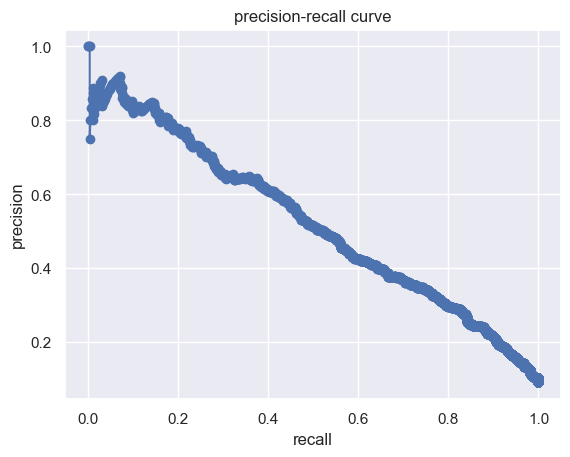

In [297]:
# XGBoost classifier

xgbc=XGBClassifier(random_state=101)
threshold_change(xgbc)

- insight: this is also a good algorithm to consider, where for 0.6 recall there is still fair enough precision 0f nearly 0.4.

    precision    recall  threshold
0    0.091236  1.000000       0.00
1    0.209677  0.902208       0.05
2    0.281515  0.785489       0.10
3    0.350195  0.709779       0.15
4    0.406746  0.646688       0.20
5    0.459926  0.588328       0.25
6    0.496951  0.514196       0.30
7    0.531876  0.460568       0.35
8    0.574944  0.405363       0.40
9    0.608815  0.348580       0.45
10   0.638686  0.276025       0.50
11   0.647321  0.228707       0.55
12   0.682635  0.179811       0.60
13   0.680000  0.134069       0.65
14   0.688312  0.083596       0.70
15   0.674419  0.045741       0.75
16   0.611111  0.017350       0.80
17   0.785714  0.017350       0.85
18   1.000000  0.004732       0.90
19   1.000000  0.001577       0.95


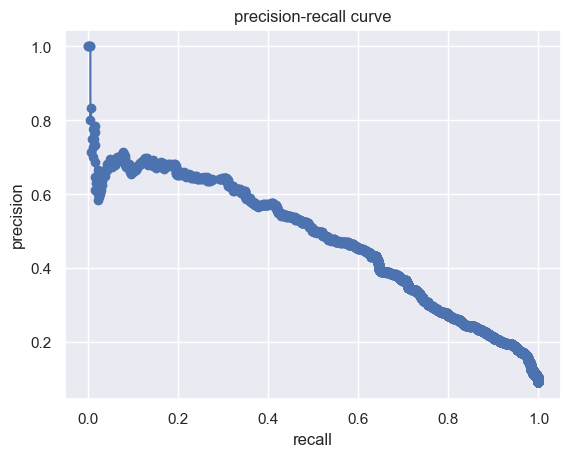

In [299]:
# SVC weighted

svc=SVC(random_state=101, class_weight='balanced', probability=True)
threshold_change(svc)

- insight: overall, SVC weighted gives the best performance when recall and precision both are important. It gives a recall of about 0.60 and precision of about 0.42.

    precision    recall  threshold
0    0.089555  0.910095       0.00
1    0.092486  0.908517       0.05
2    0.110458  0.889590       0.10
3    0.114663  0.876972       0.15
4    0.153130  0.829653       0.20
5    0.166883  0.812303       0.25
6    0.176083  0.801262       0.30
7    0.177149  0.799685       0.35
8    0.190657  0.791798       0.40
9    0.203046  0.757098       0.45
10   0.215363  0.720820       0.50
11   0.229047  0.694006       0.55
12   0.260083  0.589905       0.60
13   0.291345  0.536278       0.65
14   0.295082  0.454259       0.70
15   0.300319  0.444795       0.75
16   0.386965  0.299685       0.80
17   0.428962  0.247634       0.85
18   0.466667  0.121451       0.90
19   0.510638  0.075710       0.95


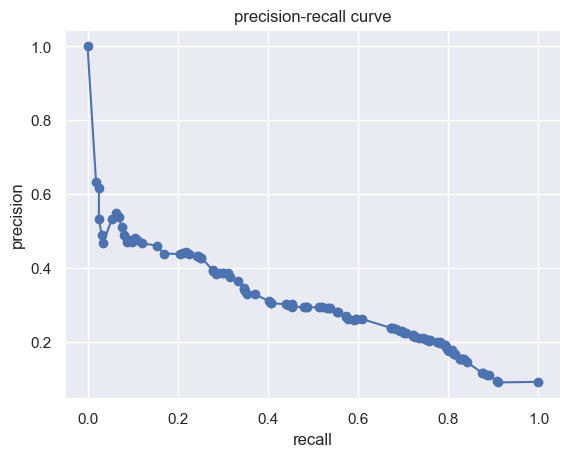

In [302]:
# DT with roc-auc

dt_roc_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random')# --->roc

threshold_change(dt_roc_tuned)

    precision    recall  threshold
0    0.093773  0.807571       0.00
1    0.132802  0.788644       0.05
2    0.160615  0.774448       0.10
3    0.179792  0.763407       0.15
4    0.211738  0.739748       0.20
5    0.226214  0.735016       0.25
6    0.233978  0.725552       0.30
7    0.241653  0.719243       0.35
8    0.244698  0.709779       0.40
9    0.270976  0.687697       0.45
10   0.273018  0.673502       0.50
11   0.281501  0.662461       0.55
12   0.285034  0.660883       0.60
13   0.290137  0.635647       0.65
14   0.324121  0.610410       0.70
15   0.334825  0.589905       0.75
16   0.355172  0.487382       0.80
17   0.413580  0.422713       0.85
18   0.498851  0.342271       0.90
19   0.655172  0.089905       0.95


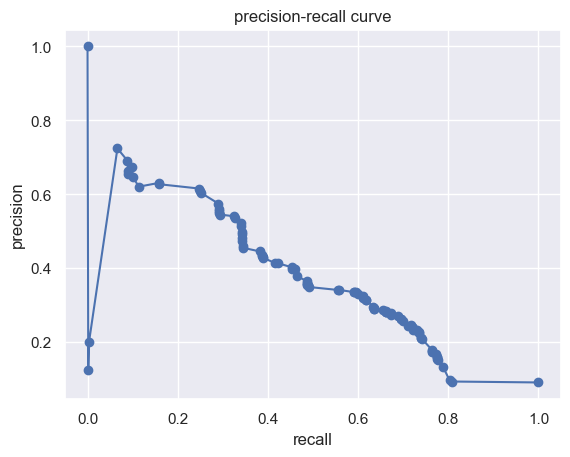

In [303]:
# DT with f1 score

dt_f1_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101) #---> f1 score

threshold_change(dt_f1_tuned)

    precision    recall  threshold
0    0.089555  0.910095       0.00
1    0.092486  0.908517       0.05
2    0.110458  0.889590       0.10
3    0.114663  0.876972       0.15
4    0.153130  0.829653       0.20
5    0.166883  0.812303       0.25
6    0.176083  0.801262       0.30
7    0.177149  0.799685       0.35
8    0.190657  0.791798       0.40
9    0.203046  0.757098       0.45
10   0.215363  0.720820       0.50
11   0.229047  0.694006       0.55
12   0.260083  0.589905       0.60
13   0.291345  0.536278       0.65
14   0.295082  0.454259       0.70
15   0.300319  0.444795       0.75
16   0.386965  0.299685       0.80
17   0.428962  0.247634       0.85
18   0.466667  0.121451       0.90
19   0.510638  0.075710       0.95


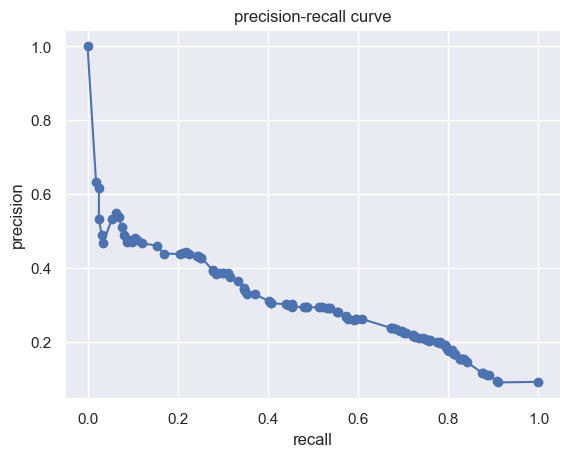

In [304]:
# DT with recall

dt_recall_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random') #---> recall

threshold_change(dt_recall_tuned)

    precision    recall  threshold
0    0.093773  0.807571       0.00
1    0.132802  0.788644       0.05
2    0.160615  0.774448       0.10
3    0.179792  0.763407       0.15
4    0.211738  0.739748       0.20
5    0.226214  0.735016       0.25
6    0.233978  0.725552       0.30
7    0.241653  0.719243       0.35
8    0.244698  0.709779       0.40
9    0.270976  0.687697       0.45
10   0.273018  0.673502       0.50
11   0.281501  0.662461       0.55
12   0.285034  0.660883       0.60
13   0.290137  0.635647       0.65
14   0.324121  0.610410       0.70
15   0.334825  0.589905       0.75
16   0.355172  0.487382       0.80
17   0.413580  0.422713       0.85
18   0.498851  0.342271       0.90
19   0.655172  0.089905       0.95


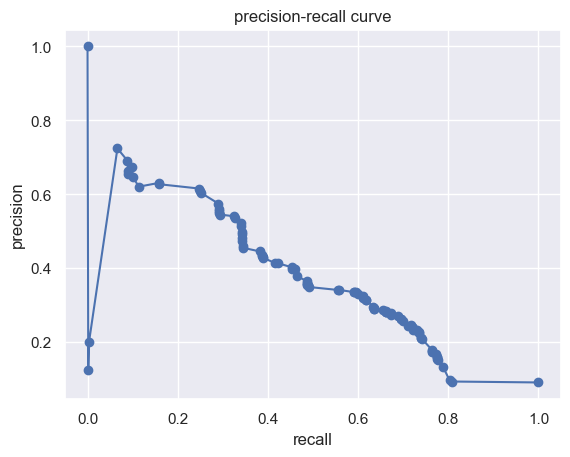

In [305]:
# DT with f1_minority

dt_f1_minority_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101) #---> f1 minority

threshold_change(dt_f1_minority_tuned)

# Voting method: on XGboost (Base) + SVC weighted

In [307]:
from sklearn.ensemble import VotingClassifier

In [308]:
# I am choosing XGBoost and SVC as they both show a good possibility of recall and precision at threshold other than 0.5

In [309]:
svc=SVC(random_state=101, class_weight='balanced', probability=True)
xgbc=XGBClassifier(random_state=101)


estimators1=[('svc_weighted', svc), ('XGBoost', xgbc)]

In [310]:
vc=VotingClassifier(estimators=estimators1, voting='soft')
vc.fit(X_train_sc, Y_train)
y_pred_test=vc.predict(X_test_sc)
cm=confusion_matrix(Y_test, y_pred_test)
cr=classification_report(Y_test, y_pred_test)

print("confusion_matrix \n", cm)
print("classification_report \n", cr)

confusion_matrix 
 [[6211  104]
 [ 422  212]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6315
           1       0.67      0.33      0.45       634

    accuracy                           0.92      6949
   macro avg       0.80      0.66      0.70      6949
weighted avg       0.91      0.92      0.91      6949



- this is not a very good model as compared to the individual model performance

In [312]:
# to consider: xgbc,ada,gbc, svc weighted, dt-tuned-roc, dt-tuned-f1-macro, dt-tuned-recall, dt-tuned-f1-minority

# Voting method: choosing the top best classifiers (i.e. models with high recall plus XGBC which also has high precision so as to get better recall and precision as output of Voting classifier)

In [313]:
svc=SVC(random_state=101, class_weight='balanced', probability=True)
xgbc=XGBClassifier(random_state=101)

# using the best tuned models fit with the best hyperparameters

dt_roc_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random')# --->roc


dt_f1_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101) #---> f1 score


dt_recall_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       random_state=101, splitter='random') #---> recall


dt_f1_minority_tuned=DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_split=10,
                       random_state=101) #---> f1 minority




estimators2=[('svc_weighted', svc), ('XGBoost', xgbc), ('dt_roc_tuned', dt_roc_tuned), 
            ('dt_f1_tuned', dt_f1_tuned), ('dt_recall_tuned', dt_recall_tuned),
            ('dt_f1_minority_tuned', dt_f1_minority_tuned)]

In [314]:
vc_soft=VotingClassifier(estimators=estimators2, voting='soft')
vc_soft.fit(X_train_sc, Y_train)
Y_pred_test=vc_soft.predict(X_test_sc)
cm=confusion_matrix(Y_test, Y_pred_test)
cr=classification_report(Y_test, Y_pred_test)

print("confusion_matrix \n", cm)
print("classification_report \n", cr)

confusion_matrix 
 [[5750  565]
 [ 262  372]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6315
           1       0.40      0.59      0.47       634

    accuracy                           0.88      6949
   macro avg       0.68      0.75      0.70      6949
weighted avg       0.91      0.88      0.89      6949



# insights:


- the precision has improved while recall is still high at 60.
- but still this is not higher than the results obtained on changing the threshold where the recall is near 60 and precision is about 41 for the SVC weighted classifier.

In [ ]:
- By Jeel Raval